In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

In [3]:
data_raw = pd.read_csv(r"d:\DE__and__ML\all_datasets\social_media_performance.csv")

In [4]:
data = data_raw.copy()

In [5]:
data.head()

,Post_ID,Platform,Post_Type,Likes,Shares,Comments,Impressions,Engagement_Rate
0,1,Facebook,Image,230,40,35,5000,4.6
1,2,Twitter,Video,150,30,20,3000,3.3
2,3,Instagram,Text,340,25,50,7000,6.2
3,4,LinkedIn,Link,120,15,15,2500,2.0
4,5,Facebook,Image,560,70,90,10000,7.2


In [6]:
# Feature Engineering: Creating new useful features
data["Shares_per_Impression"] = data["Shares"] / data["Impressions"]
data["Engagement_per_Impression"] = (data["Likes"] + data["Shares"] + data["Comments"]) / data["Impressions"]



In [7]:
data.columns

Index(['Post_ID', 'Platform', 'Post_Type', 'Likes', 'Shares', 'Comments',
       'Impressions', 'Engagement_Rate', 'Shares_per_Impression',
       'Engagement_per_Impression'],
      dtype='object')

In [8]:
data.head()

,Post_ID,Platform,Post_Type,Likes,Shares,Comments,Impressions,Engagement_Rate,Shares_per_Impression,Engagement_per_Impression
0,1,Facebook,Image,230,40,35,5000,4.6,0.008000,0.061000
1,2,Twitter,Video,150,30,20,3000,3.3,0.010000,0.066667
2,3,Instagram,Text,340,25,50,7000,6.2,0.003571,0.059286
3,4,LinkedIn,Link,120,15,15,2500,2.0,0.006000,0.060000
4,5,Facebook,Image,560,70,90,10000,7.2,0.007000,0.072000


In [9]:
data.shape

(20, 10)

In [10]:
data.describe()

,Post_ID,Likes,Shares,Comments,Impressions,Engagement_Rate,Shares_per_Impression,Engagement_per_Impression
count,20.00000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,300.500000,42.05000,45.850000,6135.000000,5.085000,0.007021,0.063157
std,5.91608,129.308892,17.85755,22.597799,2419.498643,1.632652,0.001738,0.005769
min,1.00000,120.000000,15.00000,15.000000,2500.000000,2.000000,0.003571,0.054667
25%,5.75000,210.000000,28.75000,28.750000,4175.000000,3.950000,0.006188,0.059353
50%,10.50000,295.000000,40.00000,42.500000,6200.000000,5.300000,0.006972,0.061468
75%,15.25000,355.000000,51.25000,58.500000,7825.000000,6.350000,0.008062,0.067000
max,20.00000,560.000000,80.00000,90.000000,10000.000000,7.500000,0.010937,0.075000


In [11]:
data = data.drop(["Post_ID"], axis = 1)

#also works 
# Post_ID has no impact on our target, we remove it
# data = data.drop('Post_ID',axis=1) 

In [12]:
data.columns

Index(['Platform', 'Post_Type', 'Likes', 'Shares', 'Comments', 'Impressions',
       'Engagement_Rate', 'Shares_per_Impression',
       'Engagement_per_Impression'],
      dtype='object')

In [13]:
data.isnull().sum()

Platform                     0
Post_Type                    0
Likes                        0
Shares                       0
Comments                     0
Impressions                  0
Engagement_Rate              0
Shares_per_Impression        0
Engagement_per_Impression    0
dtype: int64

In [14]:
data.duplicated().sum()

np.int64(0)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Platform                   20 non-null     object 
 1   Post_Type                  20 non-null     object 
 2   Likes                      20 non-null     int64  
 3   Shares                     20 non-null     int64  
 4   Comments                   20 non-null     int64  
 5   Impressions                20 non-null     int64  
 6   Engagement_Rate            20 non-null     float64
 7   Shares_per_Impression      20 non-null     float64
 8   Engagement_per_Impression  20 non-null     float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.5+ KB


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Platform                   20 non-null     object 
 1   Post_Type                  20 non-null     object 
 2   Likes                      20 non-null     int64  
 3   Shares                     20 non-null     int64  
 4   Comments                   20 non-null     int64  
 5   Impressions                20 non-null     int64  
 6   Engagement_Rate            20 non-null     float64
 7   Shares_per_Impression      20 non-null     float64
 8   Engagement_per_Impression  20 non-null     float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.5+ KB


In [17]:
# Separate numerical and categorical columns
num = data.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat = data.select_dtypes(include=["object"]).columns.tolist()

# Display the results
print("Numerical Columns:", num)
print("Categorical Columns:", cat)

Numerical Columns: ['Likes', 'Shares', 'Comments', 'Impressions', 'Engagement_Rate', 'Shares_per_Impression', 'Engagement_per_Impression']
Categorical Columns: ['Platform', 'Post_Type']


In [18]:
data[num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Likes                      20 non-null     int64  
 1   Shares                     20 non-null     int64  
 2   Comments                   20 non-null     int64  
 3   Impressions                20 non-null     int64  
 4   Engagement_Rate            20 non-null     float64
 5   Shares_per_Impression      20 non-null     float64
 6   Engagement_per_Impression  20 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 1.2 KB


In [19]:
# # # Scaling numerical data
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(1, 10))  # Match target range
# data[["Likes", "Shares", "Comments", "Impressions"]] = scaler.fit_transform(data[["Likes", "Shares", "Comments", "Impressions"]])


In [20]:
data[num].head()

,Likes,Shares,Comments,Impressions,Engagement_Rate,Shares_per_Impression,Engagement_per_Impression
0,230,40,35,5000,4.6,0.008000,0.061000
1,150,30,20,3000,3.3,0.010000,0.066667
2,340,25,50,7000,6.2,0.003571,0.059286
3,120,15,15,2500,2.0,0.006000,0.060000
4,560,70,90,10000,7.2,0.007000,0.072000


In [21]:
data[cat].head()

,Platform,Post_Type
0,Facebook,Image
1,Twitter,Video
2,Instagram,Text
3,LinkedIn,Link
4,Facebook,Image


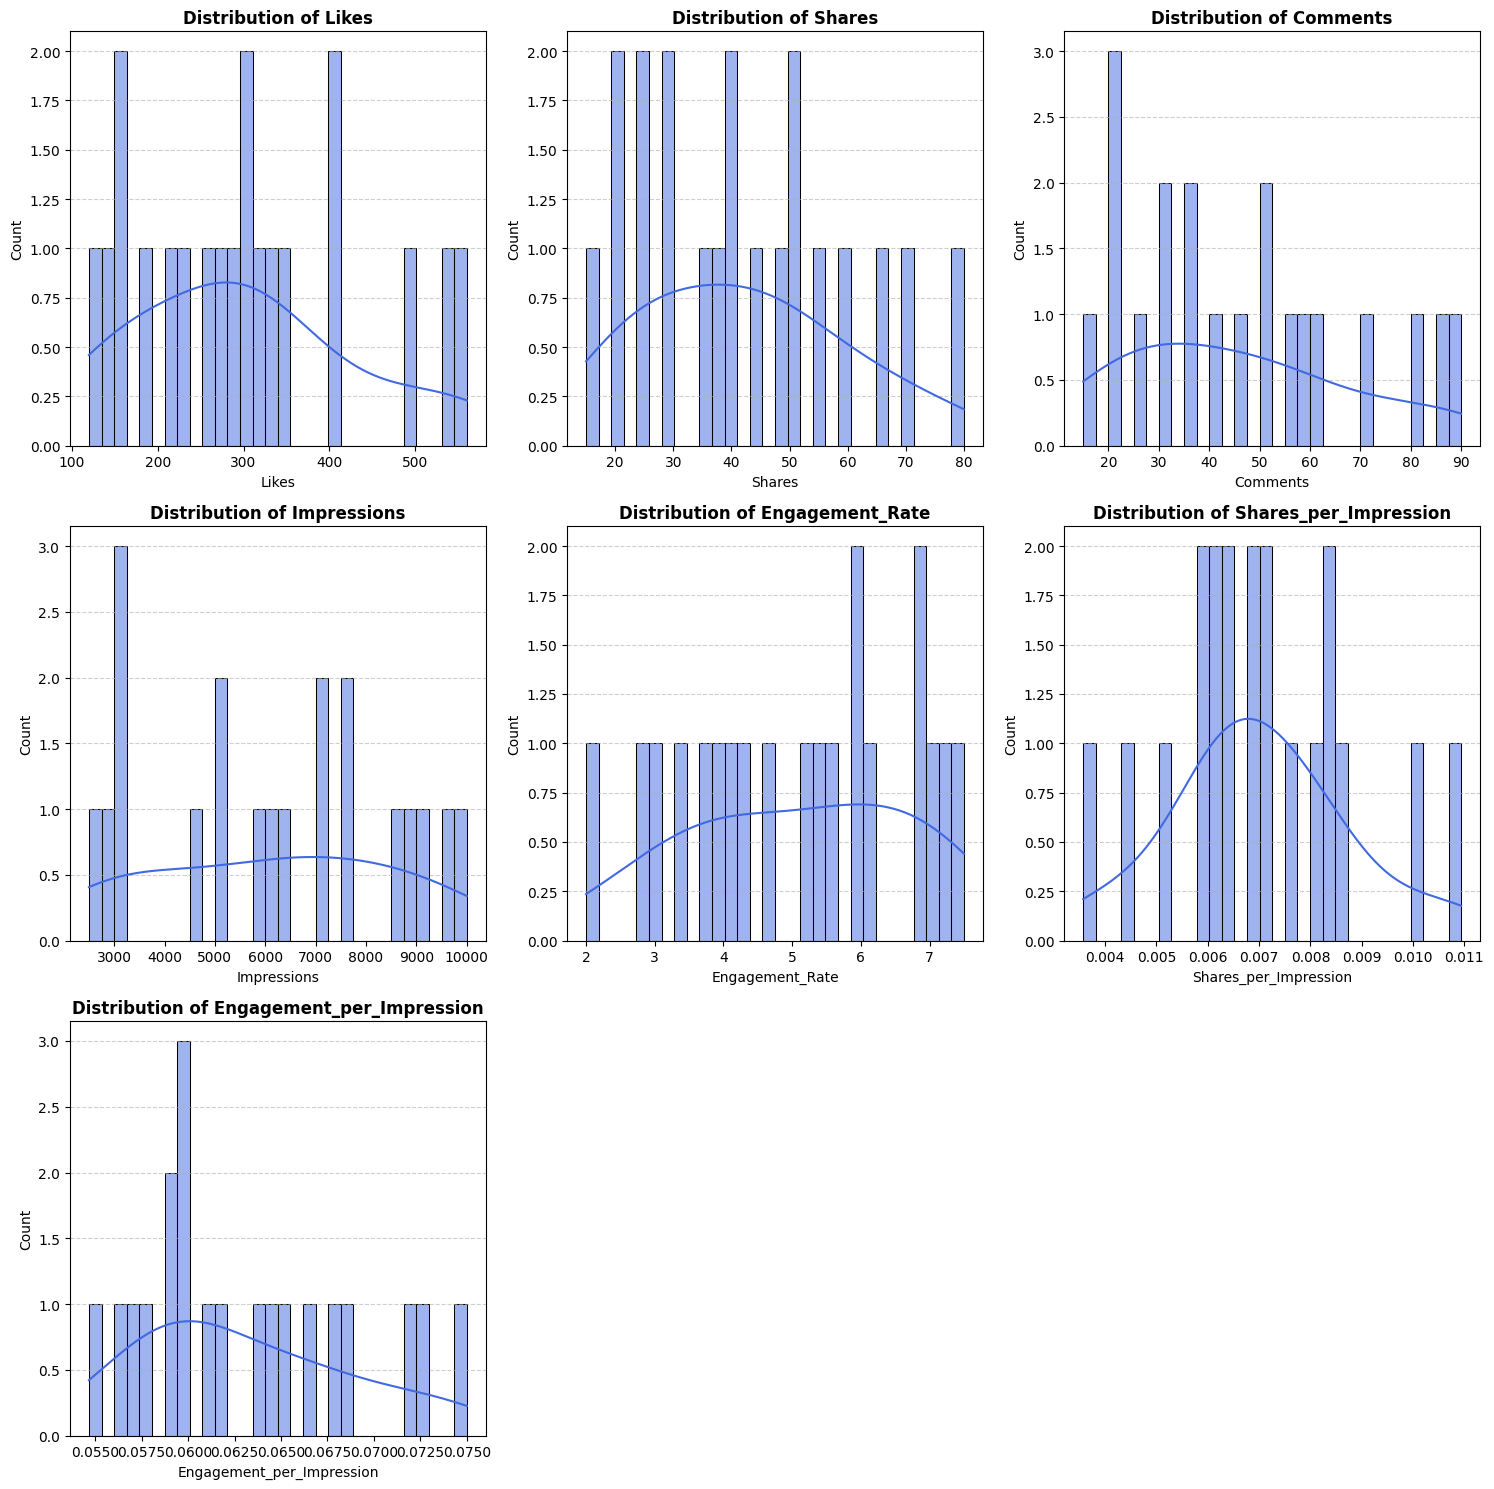

In [22]:

# Set the figure size dynamically based on the number of numerical columns
num_features = len(num)
rows = (num_features // 3) + (num_features % 3 > 0)  # Arrange in 3 columns

plt.figure(figsize=(15, 5 * rows))  # Adjust height dynamically

# Loop through each numerical column and plot
for i, num_col in enumerate(num):
    plt.subplot(rows, 3, i + 1)  # Create a subplot grid with 3 columns
    sns.histplot(data[num_col], kde=True, color="royalblue", edgecolor="black", bins=30)
    
    plt.title(f"Distribution of {num_col}", fontsize=12, fontweight='bold')
    plt.xlabel(num_col, fontsize=10)
    plt.ylabel("Count", fontsize=10)
    plt.grid(axis='y', linestyle="--", alpha=0.6)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


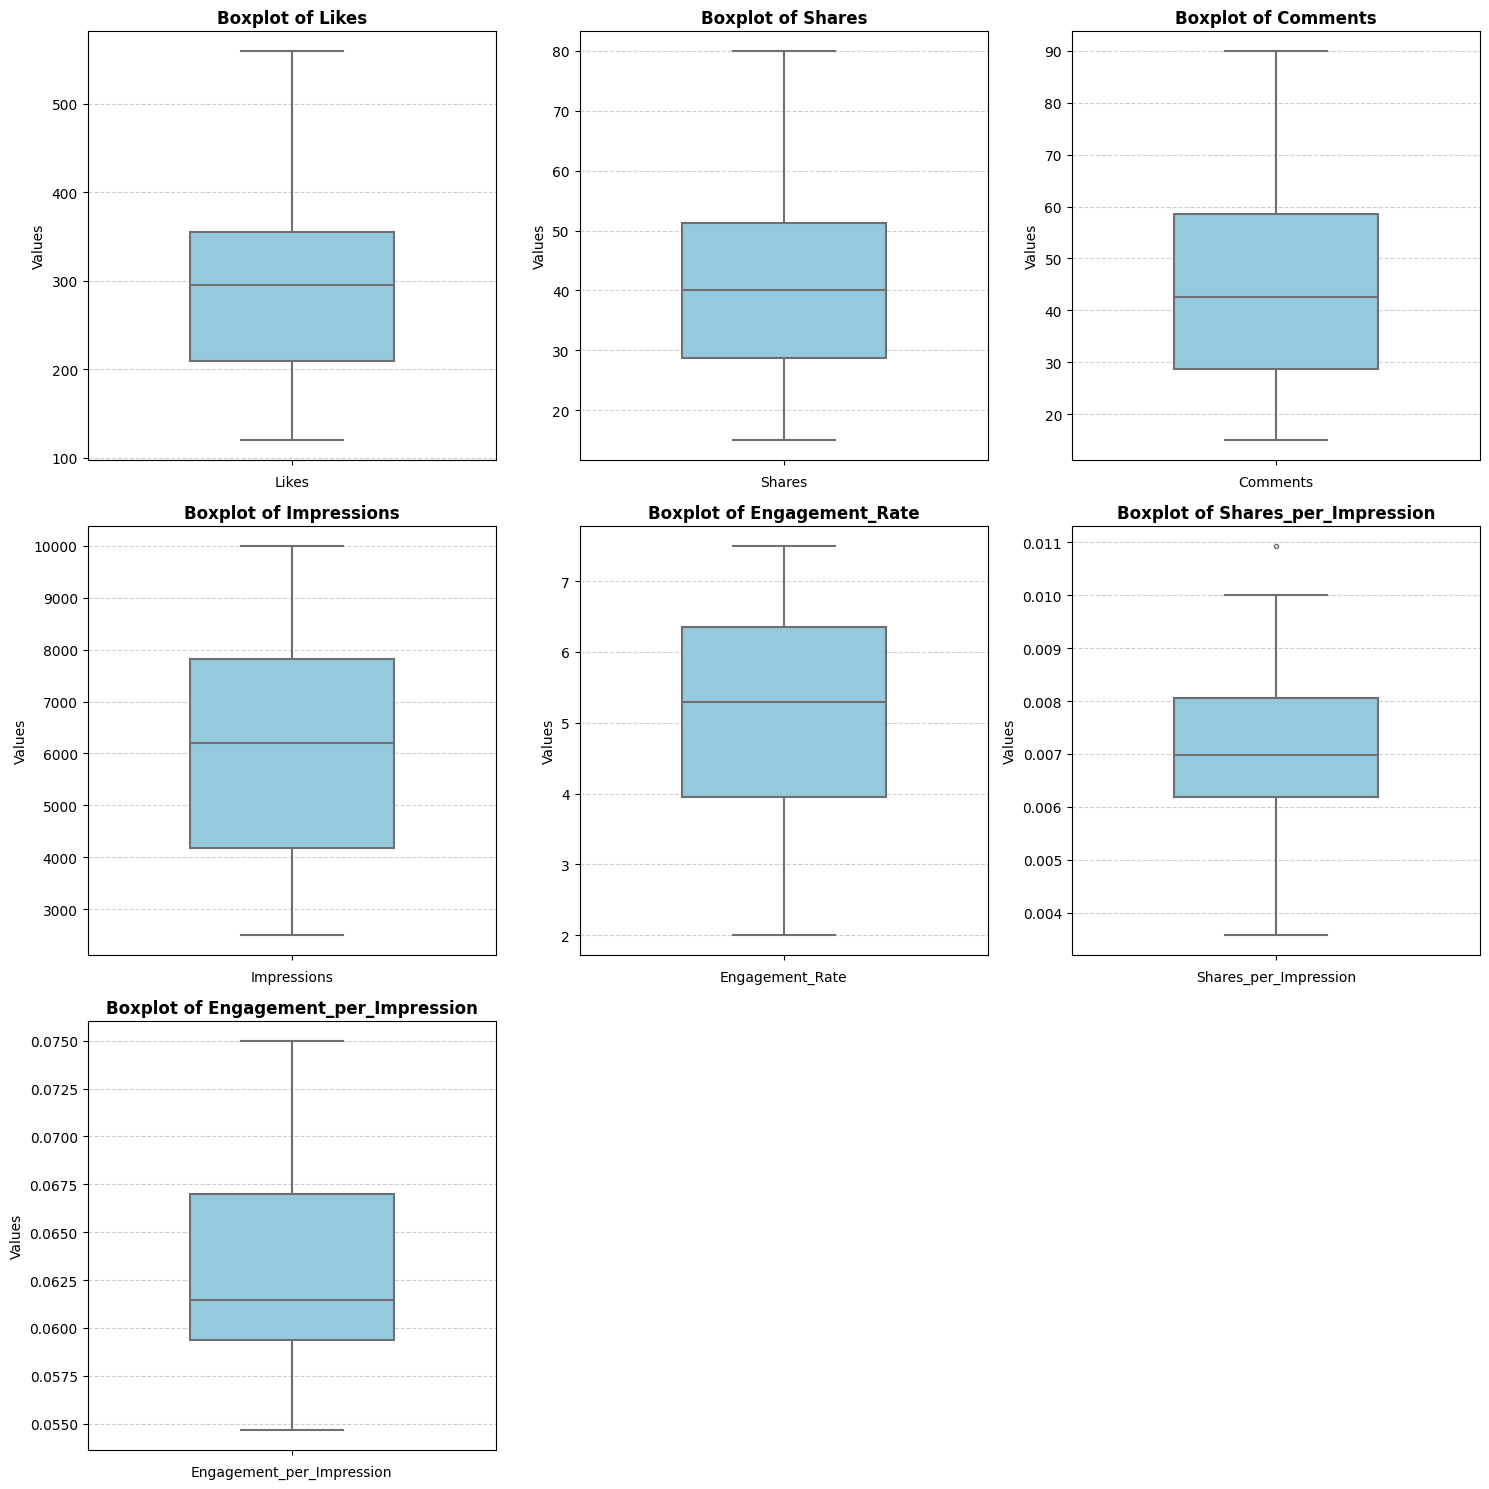

In [23]:

# Set the figure size dynamically based on the number of numerical columns
num_features = len(num)
rows = (num_features // 3) + (num_features % 3 > 0)  # Arrange in 3 columns

plt.figure(figsize=(15, 5 * rows))  # Adjust height dynamically

# Loop through each numerical column and plot
for i, num_col in enumerate(num):
    plt.subplot(rows, 3 ,i+1)  # Create a subplot grid with 3 columns
    sns.boxplot(data=data[num_col], color="skyblue", width=0.5, linewidth=1.5, fliersize=3)
    
    plt.title(f"Boxplot of {num_col}", fontsize=12, fontweight='bold')
    plt.xlabel(num_col, fontsize=10)
    plt.ylabel("Values", fontsize=10)
    plt.grid(axis='y', linestyle="--", alpha=0.6)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


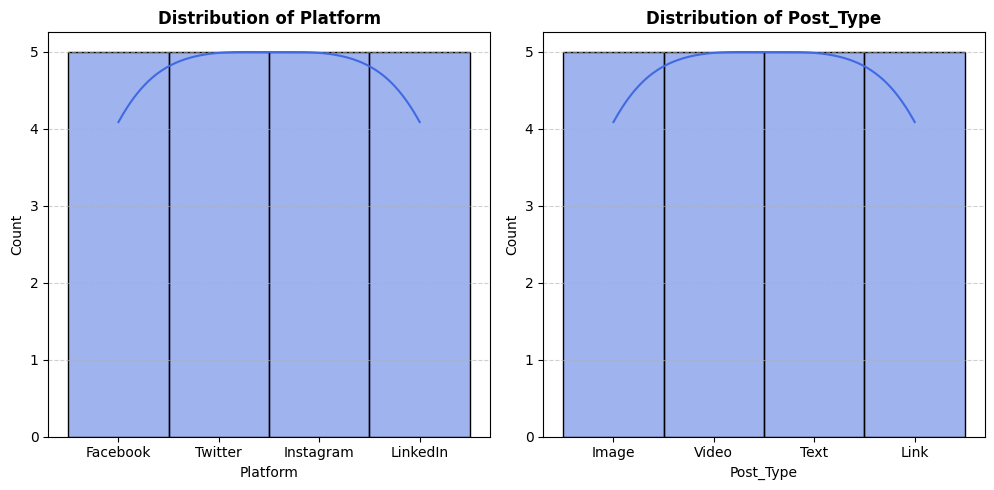

In [24]:

# Set the figure size dynamically based on the number of numerical columns
cat_features = len(cat)
rows = (cat_features // 3) + (cat_features % 3 > 0)  # Arrange in 3 columns

plt.figure(figsize=(15, 5 * rows))  # Adjust height dynamically

# Loop through each numerical column and plot
for i, cat_col in enumerate(cat):
    plt.subplot(rows, 3, i + 1)  # Create a subplot grid with 3 columns
    sns.histplot(data[cat_col], kde=True, color="royalblue", edgecolor="black", bins=30)
    
    plt.title(f"Distribution of {cat_col}", fontsize=12, fontweight='bold')
    plt.xlabel(cat_col, fontsize=10)
    plt.ylabel("Count", fontsize=10)
    plt.grid(axis='y', linestyle="--", alpha=0.6)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [25]:
# data["Engagement_Rate"] = data["Engagement_Rate"].astype(int)

data["Engagement_Rate"] = data["Engagement_Rate"].round().astype(int)

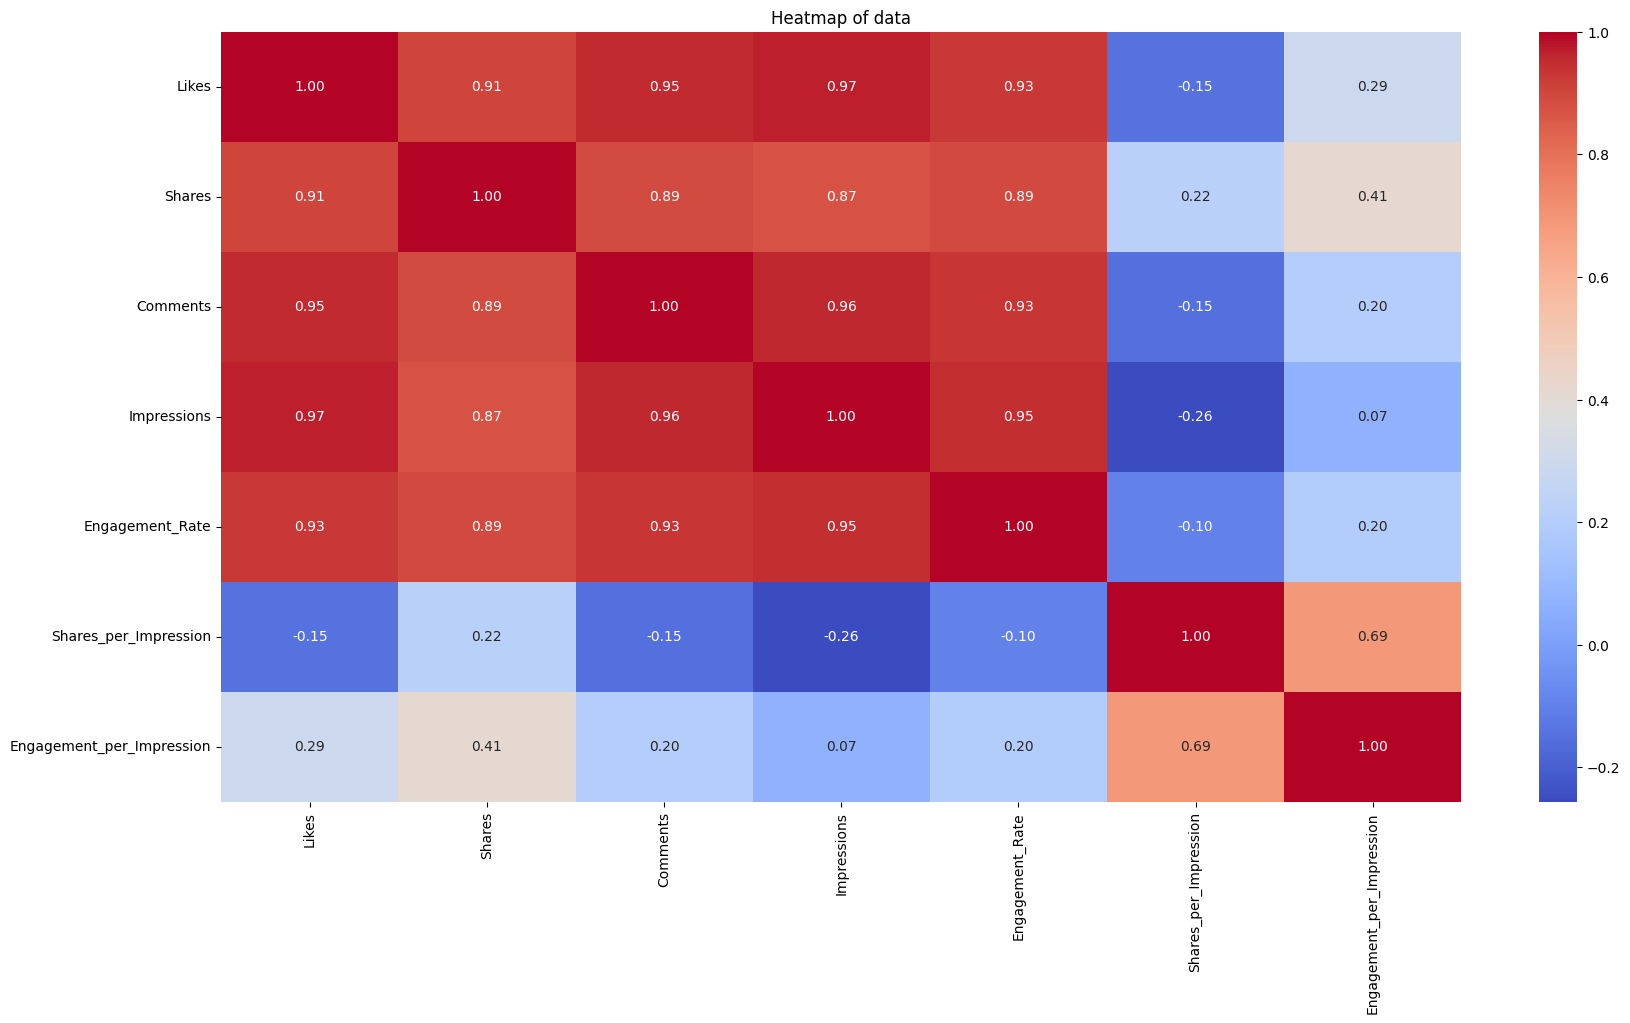

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(data[num].corr(), cmap='coolwarm', annot= True, fmt='.2f')
plt.title("Heatmap of data")
plt.show()

In [27]:
for column in data[cat]:
    unique = data[column].unique()
    print(f"{column} => {unique}")

Platform => ['Facebook' 'Twitter' 'Instagram' 'LinkedIn']
Post_Type => ['Image' 'Video' 'Text' 'Link']


In [28]:
labeling = LabelEncoder()
for column in data[cat]:
    data[column] = labeling.fit_transform(data[column])

In [29]:
for column in data[cat]:
    unique = data[column].unique()
    print(f"{column} => {unique}")



Platform => [0 3 1 2]
Post_Type => [0 3 2 1]


In [30]:
x = data.drop(['Engagement_Rate'], axis=1) 
y = data['Engagement_Rate']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [32]:
X_train.head()

,Platform,Post_Type,Likes,Shares,Comments,Impressions,Shares_per_Impression,Engagement_per_Impression
5,3,3,300,50,40,6000,0.008333,0.065000
11,2,1,260,30,35,5800,0.005172,0.056034
3,2,1,120,15,15,2500,0.006000,0.060000
18,1,2,330,48,58,7600,0.006316,0.057368
16,0,0,540,80,85,9700,0.008247,0.072680


In [33]:
# #scale only feataures no target scaling
# # Descion Tree Regressor
# # without hyper parametr tuning
# model = DecisionTreeRegressor(max_depth=6, min_samples_split=200, min_samples_leaf=70,random_state= 42)
# # model = DecisionTreeRegressor(max_depth=5, min_samples_split=100, min_samples_leaf=50,random_state= 42)
# # model = DecisionTreeRegressor(max_depth=6, min_samples_split=80, min_samples_leaf=40 , random_state=42)
# model.fit(X_train, y_train)

# # Predictions
# X_train_prediction = model.predict(X_train)
# X_test_prediction = model.predict(X_test)

# # Evaluate Regression Performance
# train_mse = mean_squared_error(y_train, X_train_prediction)
# train_mae = mean_absolute_error(y_train, X_train_prediction)
# train_r2 = r2_score(y_train, X_train_prediction)

# test_mse = mean_squared_error(y_test, X_test_prediction)
# test_mae = mean_absolute_error(y_test, X_test_prediction)
# test_r2 = r2_score(y_test, X_test_prediction)

# print(f"Training Data: MSE = {train_mse}, MAE = {train_mae}, R² = {train_r2}")
# print(f"Test Data: MSE = {test_mse}, MAE = {test_mae}, R² = {test_r2}")

In [34]:
# # scaling is good
# model = LinearRegression()
# model.fit(X_train, y_train)
# X_train_prediction = model.predict(X_train)
# training_data_accuracy = r2_score(y_train, X_train_prediction) 
# print("Training Data Accuracy:", training_data_accuracy)
# X_test_prediction = model.predict(X_test)
# test_data_accuracy = r2_score(y_test, X_test_prediction)
# print("Test Data Accuracy:", test_data_accuracy)



# # no round off of target column just integer
# # Training Data Accuracy: 0.9308439846900357
# # Test Data Accuracy: 0.8417960002179031

# # with round off



In [35]:
# from sklearn.preprocessing import PolynomialFeatures
# # # # Define the degree of the polynomial
# degree = 2 # You can experiment with different degrees
# # Transform input features
# poly = PolynomialFeatures()
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.transform(X_test)

# # Train a linear regression model on the transformed data
# model = LinearRegression()
# model.fit(X_train_poly, y_train)

# # Predict on training data
# X_train_prediction = model.predict(X_train_poly)
# training_data_accuracy = r2_score(y_train, X_train_prediction)
# print("Training Data Accuracy (Polynomial Regression):", training_data_accuracy)

# # Predict on test data
# X_test_prediction = model.predict(X_test_poly)
# test_data_accuracy = r2_score(y_test, X_test_prediction)
# print("Test Data Accuracy (Polynomial Regression):", test_data_accuracy)

In [36]:
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# print("Train Score:", model.score(X_train, y_train))
# print("Test Score:", model.score(X_test, y_test))

In [37]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# from sklearn.ensemble import GradientBoostingRegressor
# # Train the model
# model = GradientBoostingRegressor(n_estimators=50, 
#     learning_rate=0.1, 
#     max_depth=3, 
#     min_samples_split=12, 
#     min_samples_leaf=3, 
#     random_state=42)
# model.fit(X_train, y_train)

# # Predictions
# y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)

# # Evaluation metrics
# print("Train R²:", model.score(X_train, y_train))
# print("Test R²:", model.score(X_test, y_test))
# print("Train MSE:", mean_squared_error(y_train, y_train_pred))
# print("Test MSE:", mean_squared_error(y_test, y_test_pred))
# print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
# print("Test MAE:", mean_absolute_error(y_test, y_test_pred))


# Train R²: 0.9999999992944921
# Test R²: 0.9368791846598556
# Train MSE: 1.8311849775565254e-09
# Test MSE: 0.11614230022586551
# Train MAE: 3.6831806457667444e-05
# Test MAE: 0.19616796642871073





# Train R²: 0.9999999992944921
# Test R²: 0.9368791846598556
# Train MSE: 1.8311849775565254e-09
# Test MSE: 0.11614230022586551
# Train MAE: 3.6831806457667444e-05
# Test MAE: 0.19616796642871073




# Train R²: 0.9803666232149449
# Test R²: 0.9044157682238181
# Train MSE: 0.050959520188765144
# Test MSE: 0.17587498646817465
# Train MAE: 0.16178825177341646
# Test MAE: 0.3201201309921606


# rain R²: 0.9735399254760602
# Test R²: 0.920817269534952
# Train MSE: 0.06867859343102613
# Test MSE: 0.14569622405568827
# Train MAE: 0.20748537644170226
# Test MAE: 0.3057354146930183


# Train R²: 0.9654930516215549
# Test R²: 0.9337275183589434
# Train MSE: 0.08956470156894197
# Test MSE: 0.12194136621954406
# Train MAE: 0.2392249717280815
# Test MAE: 0.2465934109574725

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 4, 5],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 5]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 200}


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions on train and test sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluation metrics
print("Train R²:", r2_score(y_train * 100, y_train_pred * 100))
print("Test R²:", r2_score(y_test * 100, y_test_pred * 100))
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))


Train R²: 0.9978348300681217
Test R²: 0.9688271730136871
Train MSE: 0.00640890299835994
Test MSE: 0.054864175495910585
Train MAE: 0.05493533225670148
Test MAE: 0.17715363815706286


In [40]:
# Import the necessary library
from sklearn.ensemble import GradientBoostingRegressor

# Train the best model with optimal parameters
best_model = GradientBoostingRegressor(
    learning_rate=0.08,
    max_depth=3,
    min_samples_leaf=3,
    min_samples_split=10,
    n_estimators=200,
    random_state=42
)

# Fit the model on training data
best_model.fit(X_train, y_train)

# Evaluate performance on train and test sets
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Compute evaluation metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print the results
print(f"Train R²: {train_r2}")
print(f"Test R²: {test_r2}")
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")


# with LR 0.1
# Train R²: 0.9978348300681217
# Test R²: 0.9688271730136871
# Train MSE: 0.00640890299835994
# Test MSE: 0.054864175495910585
# Train MAE: 0.05493533225670148
# Test MAE: 0.17715363815706286

# # with LR 0.05
# Train R²: 0.9913036418531227
# Test R²: 0.9773966133649042
# Train MSE: 0.025741220114756876
# Test MSE: 0.039781960477768455
# Train MAE: 0.11517903463549262
# Test MAE: 0.14956163777197826

# # with LR 0.05
# Train R²: 0.9957479523377872
# Test R²: 0.9822274791531974
# Train MSE: 0.01258606108014964
# Test MSE: 0.03127963669037249
# Train MAE: 0.07870628757937942
# Test MAE: 0.15545047964717557


# with scaling
# Train R²: 0.9963976654438464
# Test R²: 0.9764249350793233
# Train MSE: 0.010662910286214392
# Test MSE: 0.04149211426039101
# Train MAE: 0.07197054068309476
# Test MAE: 0.17962919003671826

Train R²: 0.9963976654438464
Test R²: 0.9764249350793233
Train MSE: 0.010662910286214392
Test MSE: 0.04149211426039101
Train MAE: 0.07197054068309476
Test MAE: 0.17962919003671826


In [47]:

    # 'Facebook' 'Twitter' 'Instagram' 'LinkedIn'
    # 0               3           1          2


    #'Image' 'Video' 'Text' 'Link'
    #   0       3       2       1

# # Manually input categorical values (use same encoding as training data)
# platform_mapping = {"Facebook": 0, "Twitter": 3, "Instagram": 1, "LinkedIn": 2}  # Example encoding
# post_type_mapping = {"Image": 0, "Video": 3, "Text": 2, "Link": 1}  # Example encoding

# Example input data (Modify these values based on what you want to test)
input_data = [
#   0,	0,	3.250000,	4.461538,	3.4,	4.0,	5,	0.008000	# 4.82/5
0,	0,	10.000000,	8.615385,	10.0,	10.0,	0.007000,	0.072000  #7.12/7

]

# input_data = {
#     "Platform": "Instagram",  # Categorical
#     "Post_Type": "Image",  # Categorical
#     "Likes": 320,  
#     "Shares": 50,  
#     "Comments": 40,  
#     "Impressions": 8000,  
#     "Shares_per_Impression": 50 / 8000,  
#     "Engagement_per_Impression": (320 + 50 + 40) / 8000
# Convert categorical values to numerical (assuming Label Encoding)
# input_data[0] = platform_mapping[input_data[0]]
# input_data[1] = post_type_mapping[input_data[1]]

# Convert to NumPy array and reshape for model prediction
input_array = np.array([input_data], dtype=float)

# Make prediction using trained model
predicted_engagement = best_model.predict(input_array)

# Print the predicted Engagement Rate
print(f"Predicted Engagement Rate:  {predicted_engagement[0]:.2f}")

Predicted Engagement Rate:  2.75


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [42]:
data.head()

,Platform,Post_Type,Likes,Shares,Comments,Impressions,Engagement_Rate,Shares_per_Impression,Engagement_per_Impression
0,0,0,230,40,35,5000,5,0.008000,0.061000
1,3,3,150,30,20,3000,3,0.010000,0.066667
2,1,2,340,25,50,7000,6,0.003571,0.059286
3,2,1,120,15,15,2500,2,0.006000,0.060000
4,0,0,560,70,90,10000,7,0.007000,0.072000


In [43]:
joblib.dump(best_model, 'social_mediam_odel.joblib')

['social_mediam_odel.joblib']

In [44]:
# Check if the test sample exists in the training data
sample = np.array([[0,	0,	3.250000,	4.461538,	3.4,	4.0,	0.008000,	0.061000]]) # Example input
exists = (data.iloc[:, :-1] == sample).all(axis=1).any()
if exists:
    print("Data is seen by model")
else:
    print("Data is not seeen by model")

Data is not seeen by model


In [45]:
data.columns

Index(['Platform', 'Post_Type', 'Likes', 'Shares', 'Comments', 'Impressions',
       'Engagement_Rate', 'Shares_per_Impression',
       'Engagement_per_Impression'],
      dtype='object')

In [46]:
data.describe()

,Platform,Post_Type,Likes,Shares,Comments,Impressions,Engagement_Rate,Shares_per_Impression,Engagement_per_Impression
count,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,1.500000,1.500000,300.500000,42.05000,45.850000,6135.000000,5.10000,0.007021,0.063157
std,1.147079,1.147079,129.308892,17.85755,22.597799,2419.498643,1.68273,0.001738,0.005769
min,0.000000,0.000000,120.000000,15.00000,15.000000,2500.000000,2.00000,0.003571,0.054667
25%,0.750000,0.750000,210.000000,28.75000,28.750000,4175.000000,4.00000,0.006188,0.059353
50%,1.500000,1.500000,295.000000,40.00000,42.500000,6200.000000,5.00000,0.006972,0.061468
75%,2.250000,2.250000,355.000000,51.25000,58.500000,7825.000000,6.25000,0.008062,0.067000
max,3.000000,3.000000,560.000000,80.00000,90.000000,10000.000000,8.00000,0.010937,0.075000


In [49]:
data.to_csv("clean_media.csv", index = False)